In [136]:
import pandas as pd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
# Load datasets
import pandas as pd

# Load datasets
d = pd.read_csv('accidentRate.csv')
df = pd.read_csv('roadAccStats13-16.csv')
df1 = pd.read_csv('Details_of_road_accident_deaths_by_situation_state_2014.csv')
df2 = pd.read_csv('Persons_killed_due_to_Non-use_of_Safety_Device_2016.csv')
df4 = pd.read_csv('laneAccidents.csv')
df5 = pd.read_csv('reasonOfAccident.csv')
df6 = pd.read_csv('typeOfVehicle.csv')
df7 = pd.read_excel('timeOfOccurence.xls')
lo = pd.read_csv('location.csv')






WARNING *** OLE2 inconsistency: SSCS size is 0 but SSAT size is non-zero


In [137]:
print(df.dtypes)


SI. No.                                                          object
States/UTs                                                       object
State/UT-Wise Total Number of Road Accidents during - 2013      float64
State/UT-Wise Total Number of Road Accidents during - 2014        int64
State/UT-Wise Total Number of Road Accidents during - 2015        int64
State/UT-Wise Total Number of Road Accidents during - 2016        int64
Share of States/UTs in Total Number of Road Accidents - 2013    float64
Share of States/UTs in Total Number of Road Accidents - 2014    float64
Share of States/UTs in Total Number of Road Accidents - 2015    float64
Share of States/UTs in Total Number of Road Accidents - 2016    float64
Total Number of Accidents Per Lakh Population - 2013            float64
Total Number of Accidents Per Lakh Population - 2014            float64
Total Number of Accidents Per Lakh Population - 2015            float64
Total Number of Accidents Per Lakh Population - 2016            

Total Accidents: 1957951.0
Year Accidents:
 Year
0            0.0
2013    486476.0
2014    489400.0
2015    501423.0
2016    480652.0
Name: Accidents, dtype: float64
Percentage Accidents:
 Year
0        0.000000
2013    24.846178
2014    24.995518
2015    25.609579
2016    24.548725
Name: Accidents, dtype: float64


<Axes: xlabel='Year'>

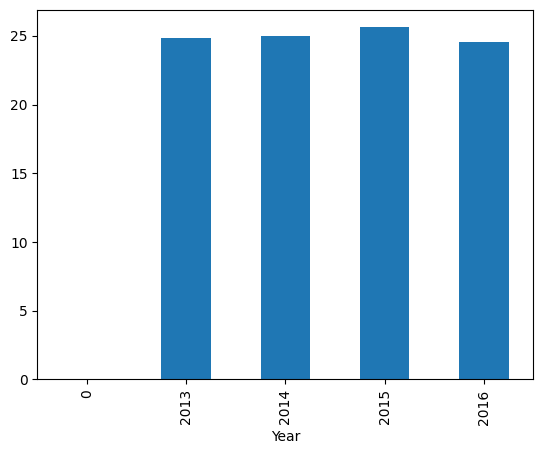

In [138]:
# Answer With Question 1
import pandas as pd
df = pd.read_csv('roadAccStats13-16.csv')
df['Year'] = df['Year'].fillna(0)
df['Year'] = df['Year'].astype(int)
total_accidents = df['Accidents'].sum()
year_accidents = df.groupby('Year')['Accidents'].sum()
print("Total Accidents:", total_accidents)  # Should be a numeric value
print("Year Accidents:\n", year_accidents)  # Should be a Serie
percentage_accidents = (year_accidents / total_accidents) * 100
print("Percentage Accidents:\n", percentage_accidents)
percentage_accidents.plot(kind='bar')


<Axes: >

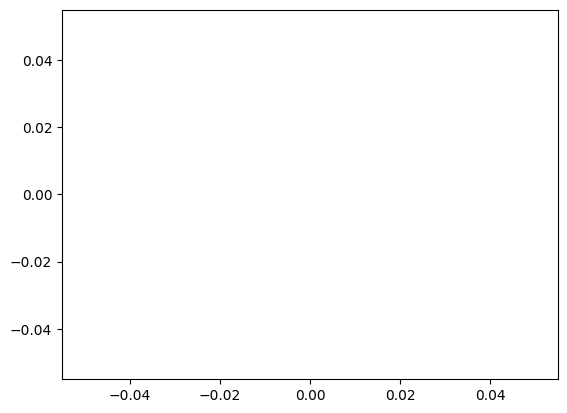

In [139]:
# Answer of Question 2
mean_accidents_per_lakh = df.groupby('Year')['Accidents'].mean() / (df['Population'] / 100000)
mean_accidents_per_lakh.plot(kind='line')


In [140]:
# Answer Of Questions 3
highest_accident_states = df.groupby('States/UTs')['Accidents'].sum().nlargest(5)
lowest_accident_states = df.groupby('States/UTs')['Accidents'].sum().nsmallest(5)
print('highest_accident_states',highest_accident_states)
print('lowest_accident_states',lowest_accident_states )


highest_accident_states States/UTs
Assam                        501423.0
Arunachal Pradesh            489400.0
Andhra Pradesh               486476.0
Bihar                        480652.0
Andaman & Nicobar Islands         0.0
Name: Accidents, dtype: float64
lowest_accident_states States/UTs
Andaman & Nicobar Islands    0.0
Chandigarh                   0.0
Chhattisgarh                 0.0
Dadra & Nagar Haveli         0.0
Daman & Diu                  0.0
Name: Accidents, dtype: float64


<Axes: xlabel='Gender'>

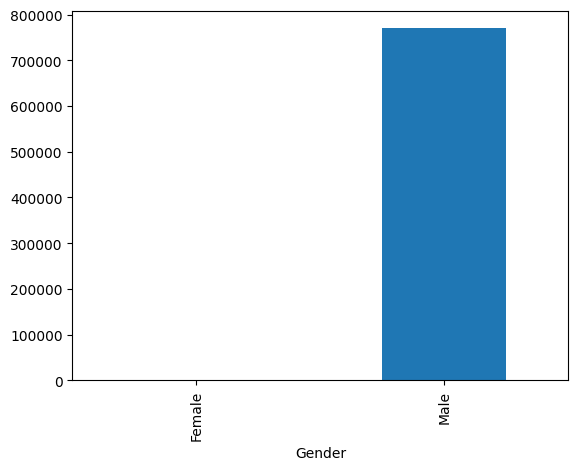

In [141]:
# Answer Of Questions 4
gender_stats = df1.groupby('Gender')['Deaths'].sum()
gender_stats.plot(kind='bar')


In [142]:
# Answer Of Questions 5
helmet_deaths = df2.groupby('Gender')['Deaths'].sum()
helmet_deaths_percentage = (helmet_deaths / helmet_deaths.sum()) * 100
print('helmet_deaths_percentage',helmet_deaths_percentage)


helmet_deaths_percentage Gender
Male    100.0
Name: Deaths, dtype: float64


<Axes: >

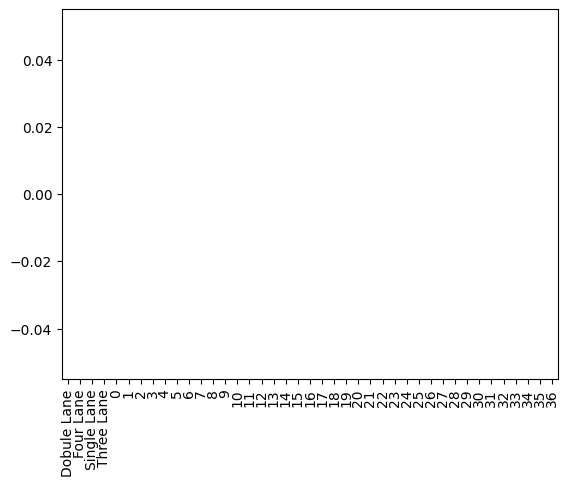

In [143]:
# Answer Of Questions 
lane_stats = df4.groupby('Lane_Types')['Accidents'].sum() / (df4['Population'] / 100000)
lane_stats.plot(kind='bar')


<Axes: >

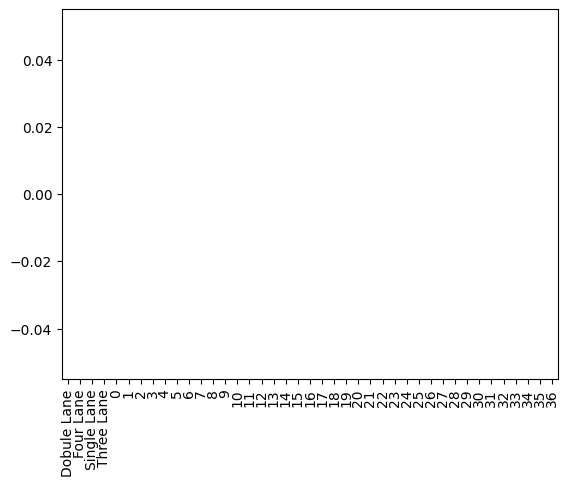

In [144]:
# Answer Of Questions 8
lane_stats = df4.groupby('Lane_Types')['Injured'].sum() / (df4['Population'] / 100000)
lane_stats.plot(kind='bar')

<Axes: >

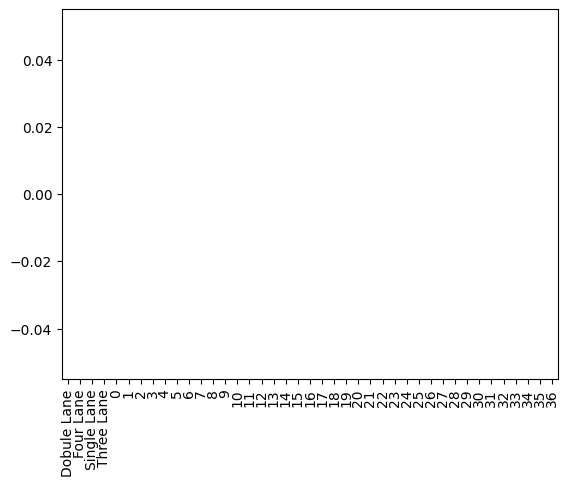

In [145]:
# Answer Of Questions 9
lane_stats = df4.groupby('Lane_Types')['Killed'].sum() / (df4['Population'] / 100)
lane_stats.plot(kind='bar')

<Axes: xlabel='Lane_Types'>

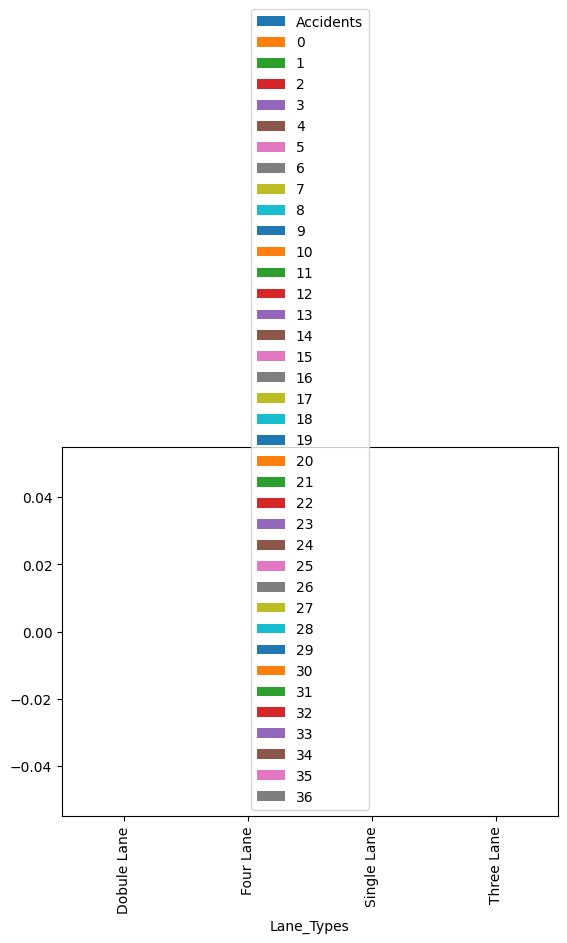

In [179]:

import pandas as pd
df4 = pd.read_csv('laneAccidents.csv')
lane_stats = df4.groupby('Lane_Types')[['Accidents']].sum() / (df4['Population'] / 1000)
lane_stats.plot(kind='bar')


<Axes: >

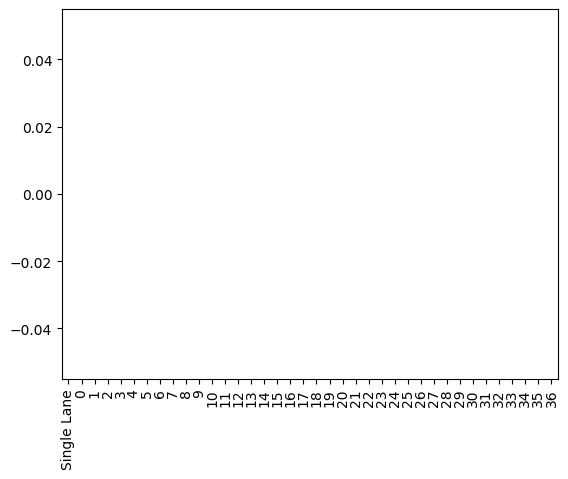

In [180]:

import pandas as pd
df4 = pd.read_csv('laneAccidents.csv')
lane_stats = df4.groupby('Single_Lane')['Count1'].sum() / (df4['Population'] / 100000)
lane_stats.plot(kind='bar')


<Axes: >

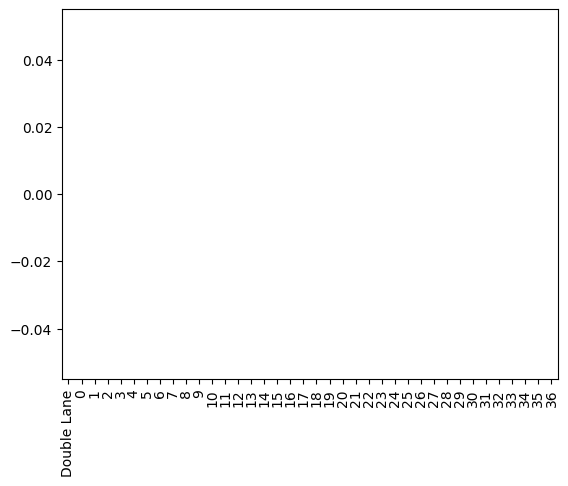

In [181]:
# Answer Of Questions 11
lane_stats = df4.groupby('Double_Lane')['Count2'].sum() / (df4['Population'] / 1000)
lane_stats.plot(kind='bar')

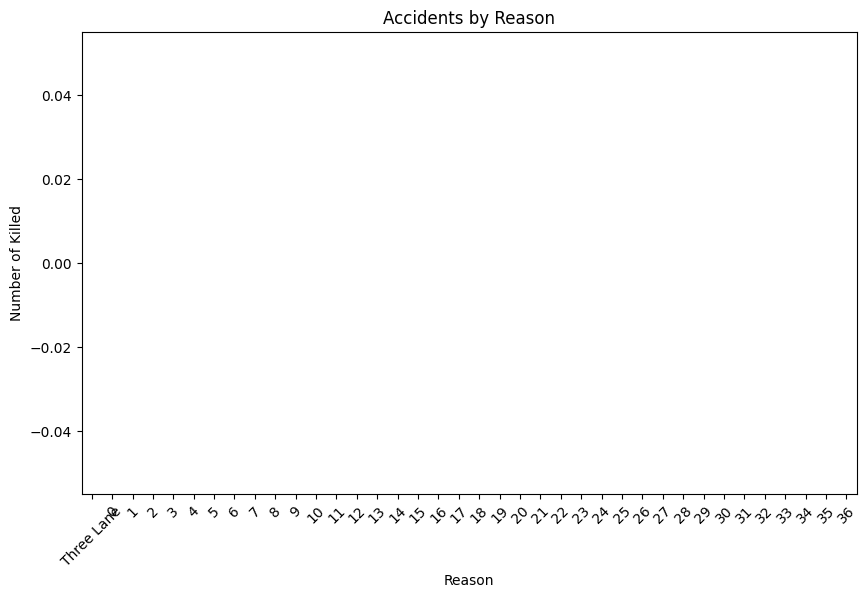

In [182]:
# Answer Of Questions 12
lane_stats = df4.groupby('Three_Lane')['Count3'].sum() / (df4['Population'] / 1000)
plt.figure(figsize=(10, 6))
lane_stats.plot(kind='bar', color='red')
plt.title('Accidents by Reason')
plt.ylabel('Number of Killed')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()

<Axes: >

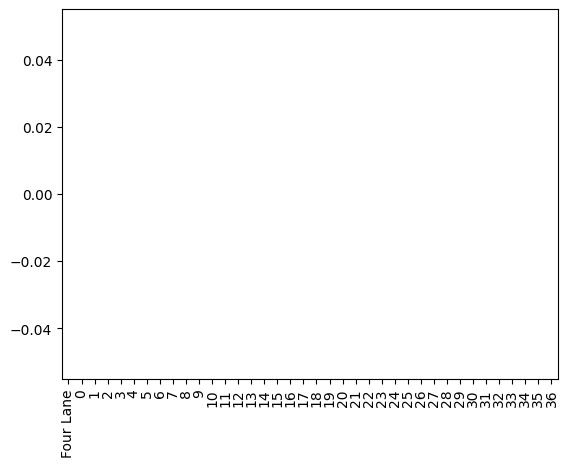

In [183]:
# Answer Of Questions 13
lane_stats = df4.groupby('Four_Lane')['Count4'].sum() / (df4['Population'] / 1000)
lane_stats.plot(kind='bar')

In [184]:
reason_killed = df5.groupby('Reason')['Killed'].sum() / 1000
print(reason_killed)


Reason
Defect in road condition                  0.000286
Deffect in condition of Motor Vechicle    0.000293
Faling of boulders                        0.000061
Falut of Driver                           0.008496
Fault Of Driver Of other vehicles         0.000437
Fault of Passenger                        0.000221
Fault of pedestrain                       0.000211
Other casues / casues not known           0.000900
Poor light                                0.000149
Weather in condition                      0.000211
Name: Killed, dtype: float64


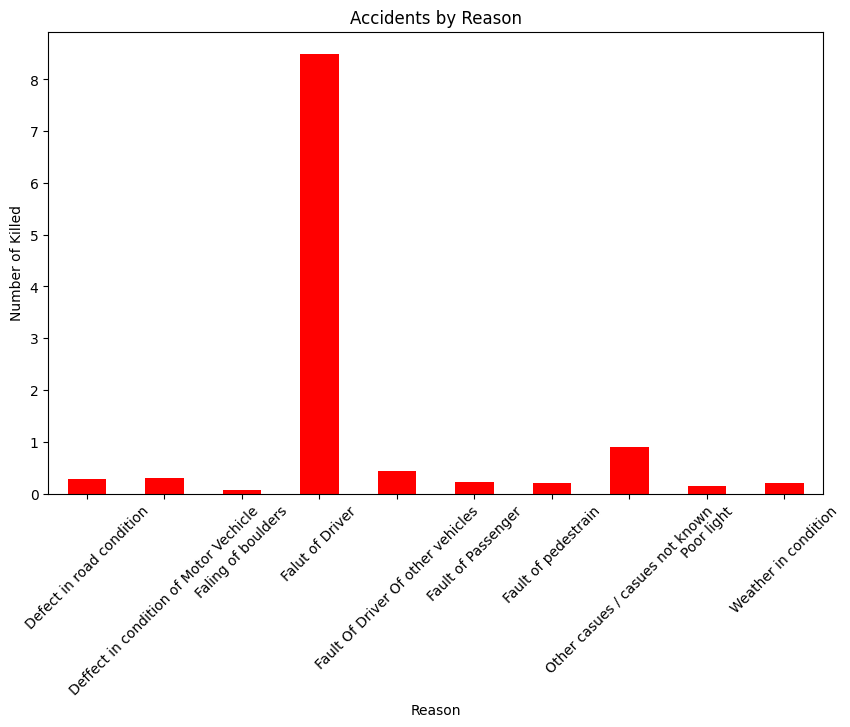

In [185]:
# Answer Of Questions 15
reason_killed = df5.groupby('Reason')['Killed'].sum()
plt.figure(figsize=(10, 6))
reason_killed.plot(kind='bar', color='red')
plt.title('Accidents by Reason')
plt.ylabel('Number of Killed')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()


In [186]:
print(df5.dtypes);

Sl. No                                                               object
States/UTs                                                           object
Fault of Driver-Total No. of Road Accidents - 2014                  float64
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people    float64
Fault of Driver-Number of Persons-Killed - 2014                       int64
                                                                     ...   
Fault Of Driver Of other vehicles Total                             float64
Fault of pedestrain Total                                           float64
Deffect in condition of Motor Vechicle Total                        float64
Defect in road condition Total                                      float64
Weather in condition Total                                          float64
Length: 73, dtype: object


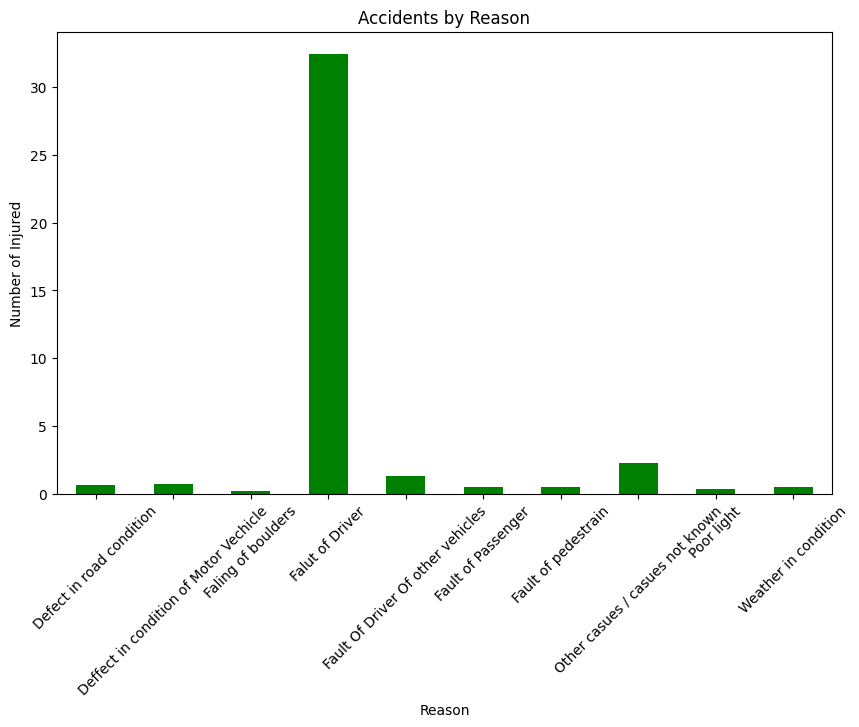

In [187]:
# Answer Of Questions 16
reason_injured = df5.groupby('Reason')['Injured'].sum()
plt.figure(figsize=(10, 6))
reason_injured.plot(kind='bar', color='green')
plt.title('Accidents by Reason')
plt.ylabel('Number of Injured')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()

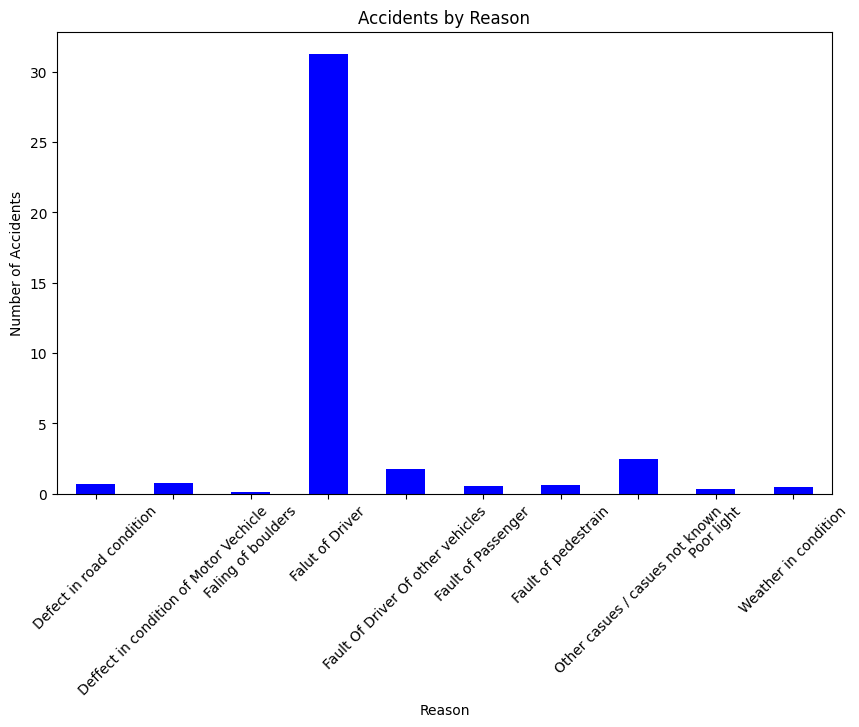

In [188]:
# Answer Of Questions 17
reason_accidents = df5.groupby('Reason')['Accidents'].sum()

# Plot
plt.figure(figsize=(10, 6))
reason_accidents.plot(kind='bar', color='blue')
plt.title('Accidents by Reason')
plt.ylabel('Number of Accidents')
plt.xlabel('Reason')
plt.xticks(rotation=45)
plt.show()

In [196]:
# Answer Of Questions 18
#driver_fault = df5[df5['Reason'] == 'Fault of Driver']['Total Number Of'].sum().mean();
driver_fault = df5[df5['Reason']=='Falut of Driver']['Total Number Of'].sum().mean();
print(f"Accidents due to driver fault per lakh: {driver_fault}")

Accidents due to driver fault per lakh: 8.49631062


In [197]:
# Answer Of Questions 19
driver_fault = df5[df5['Reason']=='Fault of pedestrain']['Fault of pedestrain Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {driver_fault}")


Accidents due to driver fault per lakh: 0.211008


In [198]:
# Answer Of Questions 21
Deffect_in_condition_of_motor_vechicle = df5[df5['Reason']=='Deffect in condition of Motor Vechicle']['Deffect in condition of Motor Vechicle Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {Deffect_in_condition_of_motor_vechicle}")

Accidents due to driver fault per lakh: 0.0


In [199]:
print(df5.dtypes)

Sl. No                                                               object
States/UTs                                                           object
Fault of Driver-Total No. of Road Accidents - 2014                  float64
Fault of Driver-Total No. of Road Accidents - 2014 per 1L people    float64
Fault of Driver-Number of Persons-Killed - 2014                       int64
                                                                     ...   
Fault Of Driver Of other vehicles Total                             float64
Fault of pedestrain Total                                           float64
Deffect in condition of Motor Vechicle Total                        float64
Defect in road condition Total                                      float64
Weather in condition Total                                          float64
Length: 73, dtype: object


In [200]:
# Answer Of Questions 22
Defect_in_road_condition = df5[df5['Reason']=='Defect in road condition']['Defect in road condition Total'].sum().mean();
print(f"Accidents due to driver fault per lakh: {Deffect_in_condition_of_motor_vechicle}")

Accidents due to driver fault per lakh: 0.0
